In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

<h2>Data Cleansing
    <h4>In this section, we import the dataset and correct any problems that could interfere with our anaylisis. This includes: <br> 
        <ul>
<li>Removing unnecessary columns</li>
<li>Ensuring that missing values are filled and extreme outliers are recognized</li>
<li>Checking that data types fit our needs</li>
        </ul>

In [144]:
ds=pd.read_csv("/Users/ben/Desktop/supermarket_sales - Sheet1.csv")
print(ds.head())
print(ds.dtypes)

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [134]:
ds.columns


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

<h4>There is only 1 'Branch' for each 'City', so we will remove the 'Branch' column as it is redundant. <br> We will remove the 'gross margin percentage' column as well. It has the same value for every row so it does not provide actionable information. <br>The "Tax" column represents a predetermined and un-changeable percentage. So we don't need that column either.

In [328]:
#removes unwanted columns and checks for empty cells
def basic_data_cleansing (cols_to_drop):
    global clean_ds
    clean_ds=ds.drop(cols_to_drop, 1)
    check_na=clean_ds.isna().sum()
    print("New Column List and # of emtpy cells\n\n",check_na)
basic_data_cleansing(['Branch','gross margin percentage','Tax 5%'])


New Column List and # of emtpy cells

 Invoice ID       0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Total            0
Date             0
Time             0
Payment          0
cogs             0
gross income     0
Rating           0
dtype: int64


In [233]:
#converts'Date' and 'Time' to pandas datetime dtype. Converts 'Gender' to Female=1, Male=0.
clean_ds['Date']=pd.to_datetime(clean_ds['Date'])
clean_ds['Time']=pd.to_datetime(clean_ds['Time'])
clean_ds['Gender'] = (clean_ds['Gender']=='Female').astype(int)
print(clean_ds.dtypes)
print(clean_ds.head())

Invoice ID               object
City                     object
Customer type            object
Gender                    int64
Product line             object
Unit price              float64
Quantity                  int64
Total                   float64
Date             datetime64[ns]
Time             datetime64[ns]
Payment                  object
cogs                    float64
gross income            float64
Rating                  float64
dtype: object
    Invoice ID       City Customer type  Gender            Product line  \
0  750-67-8428     Yangon        Member       1       Health and beauty   
1  226-31-3081  Naypyitaw        Normal       1  Electronic accessories   
2  631-41-3108     Yangon        Normal       0      Home and lifestyle   
3  123-19-1176     Yangon        Member       0       Health and beauty   
4  373-73-7910     Yangon        Normal       0       Sports and travel   

   Unit price  Quantity     Total       Date                Time      Payment  \
0     

<h2>Insights 
    <h4>First we will look at correlations between categorical variables and sales(numerical) variables. 
        If some variables seem to have a larger effect on sales we will focus our recomendations on them later. 
        

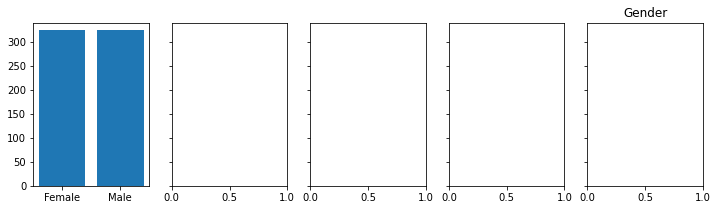

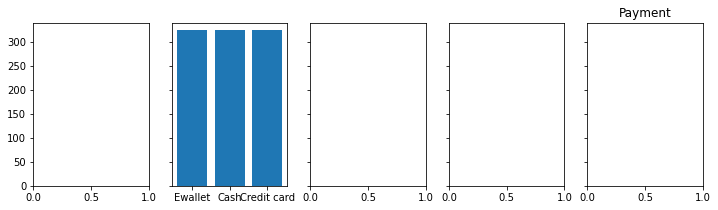

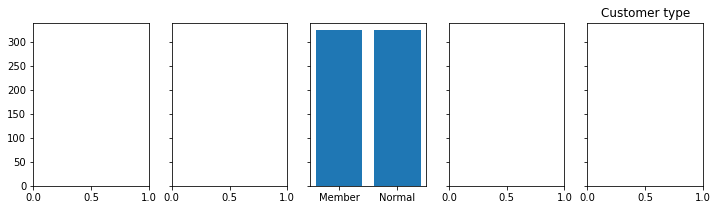

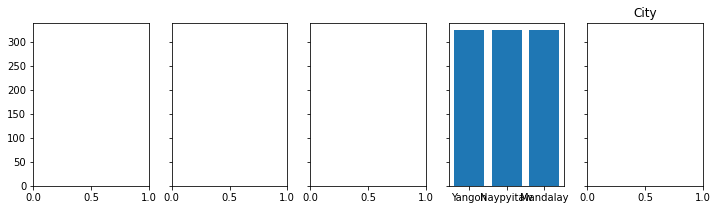

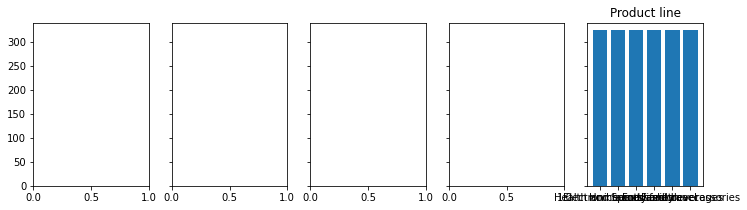

In [329]:
#My first attempt trying to loop through all variables to compare bar charts and see which might provide insights.
#So far I haven't figured out how to get them all on one line.
#Not sure why all bars are showing the same values. I suspect they are showing an overall average for sales. 
#But I can't figure out how to avoid that.
#Later on I try a different approach to this.
cats_to_plot=['Gender','Payment','Customer type','City', 'Product line']
index=[0,1,2,3,4]
for i, col in enumerate(cats_to_plot):
    order=index[i]
    fig, axs = plt.subplots(1, 5, figsize=(12,3), sharey=True)
    axs[order].bar(clean_ds[col], clean_ds['Total'].agg('mean'))
    plt.title(col)
   


<AxesSubplot:>

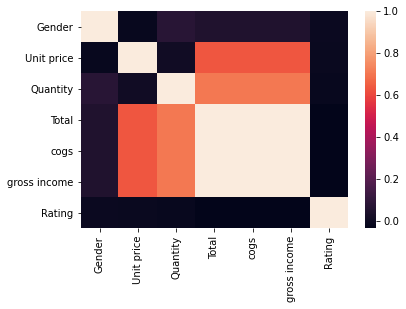

In [152]:
#Just trying out this method. 
#To make it useful I would need to creat a correlation grid with categories on one axis and numerical data on the other.
import seaborn as sns
sns.heatmap(clean_ds.corr())

<h3> I created a function here that use throughout the rest of the project to group sales by variables.

In [330]:
#Creates a function that will be used to explore correlations between sales (sum and average) and transaction variables.
def groupfunc (c1, c2, calc):
    return(clean_ds.groupby([c1])[c2].agg(calc))
#one example of use case for this function
sales_by_date = groupfunc ('Date', 'Total', 'sum')
print(sales_by_date) 

Date
1/1/2019     4745.1810
1/10/2019    3560.9490
1/11/2019    2114.9625
1/12/2019    5184.7635
1/13/2019    2451.2040
               ...    
3/5/2019     6230.8785
3/6/2019     3092.5965
3/7/2019     1438.2585
3/8/2019     3125.3880
3/9/2019     7474.0470
Name: Total, Length: 89, dtype: float64


<h3>Let's try looping through our categories and plotting each one to see if any have a clear correlation with sales
   

In [355]:
cats_to_plot=['Gender','Payment','Customer type','City', 'Product line']
for col in cats_to_plot:
    print(groupfunc(col,'Total','sum'))
    

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64
Payment
Cash           112206.570
Credit card    100767.072
Ewallet        109993.107
Name: Total, dtype: float64
Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64
City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64
Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64


<h3>The above code returned the arrays as expected. But when I try to loop through the same sequence and plot the results. It only shows the last item in the list. And that bar plot does not look like it is showing the same result as the array above. The bar chart shows a big difference between product line sales. The array shows a much smaller difference for these categories. 

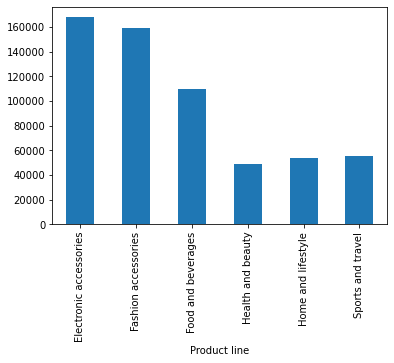

In [356]:
cats_to_plot=['Gender','Payment','Customer type','City', 'Product line']
for col in cats_to_plot:
    groupfunc(col,'Total','sum').plot.bar()

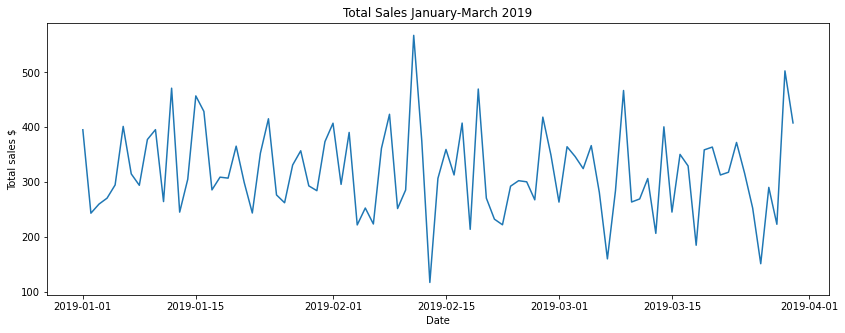

In [324]:
plt.figure(figsize=(14, 5))
total_sales_line = plt.plot(sales_by_date)
plt.title('Total Sales January-March 2019')
plt.xlabel('Date')
plt.ylabel('Total sales $')
plt.show()

<h3>The line plot above does not suggest any clear trend in sales over this time period.
   <br>So lets see if grouping sales by day gives any new results.

Text(0.5, 1.0, 'Total sales grouped by day using groupfunc')

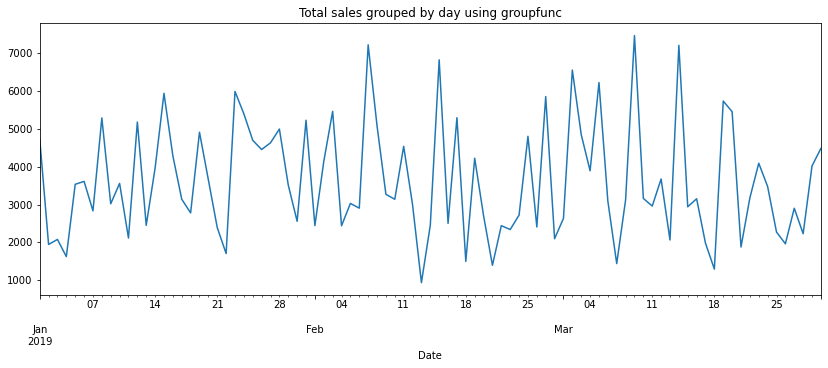

In [327]:
plt.figure(figsize=(14, 5))
day_totals=groupfunc('Date', 'Total','sum')
day_totals.plot()
plt.title('Total sales grouped by day using groupfunc')


In [289]:
sum_sales_by_product = groupfunc("Product line", "Total", "sum")
avg_sales_by_product = groupfunc("Product line", "Total", "mean")
print('Sum\n', sum_sales_by_product, '\n\nMean\n',avg_sales_by_product)

Sum
 Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64 

Mean
 Product line
Electronic accessories    319.632538
Fashion accessories       305.089298
Food and beverages        322.671517
Health and beauty         323.643020
Home and lifestyle        336.636956
Sports and travel         332.065220
Name: Total, dtype: float64


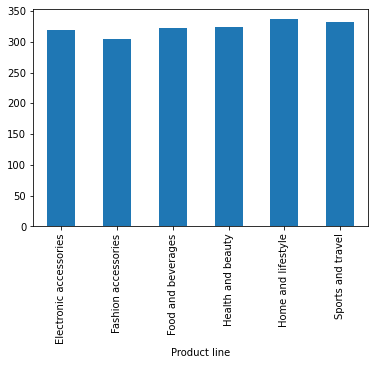

In [308]:
#I would expect this plot to look the same as the product line bar plot from above. 
#but it doesn't.
avg_sales_by_product.plot.bar()
plt.show()

<AxesSubplot:xlabel='Date'>

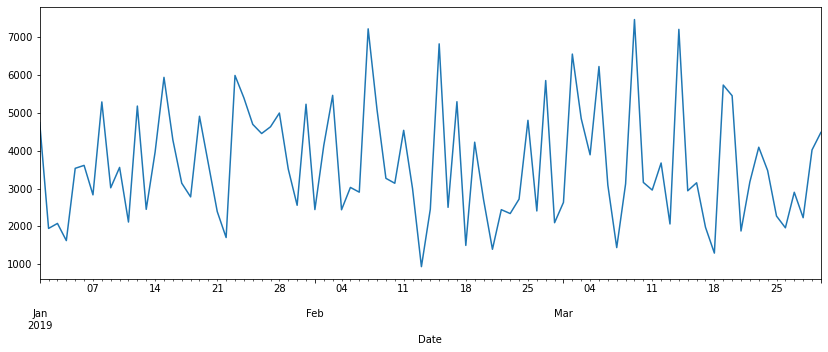

In [326]:
plt.figure(figsize=(14, 5))
day_totals=groupfunc('Date', 'Total','sum')
day_totals.plot()
plt.title

<AxesSubplot:xlabel='City'>

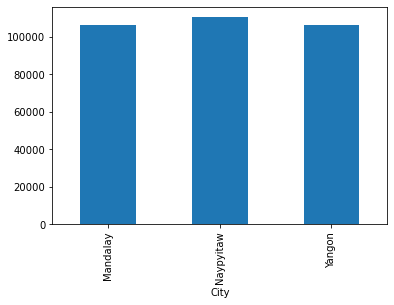

In [269]:
sales_by_city = groupfunc('City','Total','sum')

sales_by_city.plot.bar()


In [252]:
#looking at variance in mean sales for each categorical variable. Why do these look greater than they do in bar plots?
cats_to_plot=['Gender','Payment','Customer type','City','Product line']
for col in cats_to_plot:
    print(str(col)," Variance: ",np.var(groupfunc(col,'Total','mean')))
    

Gender  Variance:  147.70066193459888
Payment  Variance:  9.537202528880789
Customer type  Variance:  23.36972979303099
City  Variance:  107.29478609868477
Product line  Variance:  100.04924290515838


In [265]:
#Creates a new column for day of the week.
clean_ds['day_of_week']=clean_ds['Date'].dt.day_name()
print(clean_ds['day_of_week'])

0      Saturday
1        Friday
2        Sunday
3        Sunday
4        Friday
         ...   
995     Tuesday
996    Saturday
997    Saturday
998      Friday
999      Monday
Name: day_of_week, Length: 1000, dtype: object


In [272]:
total_sales_by_day=groupfunc('day_of_week','Total','sum')
print(total_sales_by_day)

day_of_week
Friday       43926.3405
Monday       37899.0780
Saturday     56120.8095
Sunday       44457.8925
Thursday     45349.2480
Tuesday      51482.2455
Wednesday    43731.1350
Name: Total, dtype: float64


<AxesSubplot:xlabel='day_of_week'>

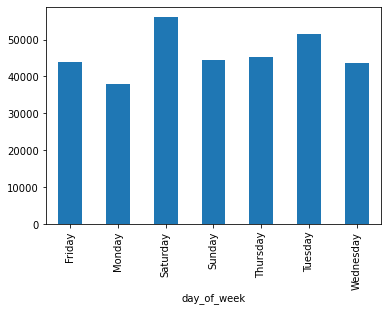

In [273]:
total_sales_by_day.plot.bar()

<h3>Attempting ARIMA

In [310]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame

In [313]:
np.asarray(clean_ds)

array([['750-67-8428', 'Yangon', 'Member', ..., 26.1415, 9.1, 'Saturday'],
       ['226-31-3081', 'Naypyitaw', 'Normal', ..., 3.82, 9.6, 'Friday'],
       ['631-41-3108', 'Yangon', 'Normal', ..., 16.2155, 7.4, 'Sunday'],
       ...,
       ['727-02-1313', 'Yangon', 'Member', ..., 1.592, 7.7, 'Saturday'],
       ['347-56-2442', 'Yangon', 'Normal', ..., 3.291, 4.1, 'Friday'],
       ['849-09-3807', 'Yangon', 'Member', ..., 30.919, 6.6, 'Monday']],
      dtype=object)

/Users/ben/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ben/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ben/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   89
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -775.185
Date:                Sun, 12 Sep 2021   AIC                           1562.369
Time:                        08:10:39   BIC                           1577.233
Sample:                    01-01-2019   HQIC                          1568.357
                         - 03-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8955      0.129     -6.958      0.000      -1.148      -0.643
ar.L2         -0.8251      0.155     -5.323      0.000      -1.129      -0.521
ar.L3         -0.6167      0.142     -4.353      0.0

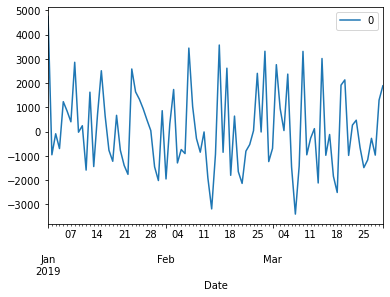

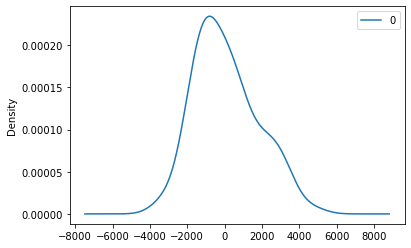

                 0
count    89.000000
mean     80.716881
std    1688.442583
min   -3404.833312
25%   -1171.574705
50%     -91.826518
75%    1028.838760
max    4745.181000


In [321]:
series=groupfunc('Date','Total','sum')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())